In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

In [3]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [4]:
# Salary Parsing

In [5]:
df['hourly']= df['Salary Estimate'].apply(lambda x : 1 if 'per hour' in x.lower() else 0)

In [6]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0


In [7]:
df['employer provided'] = df['Salary Estimate'].apply(lambda x : 1 if ' employer provided salary:' in x.lower() else 0)

In [8]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0


In [9]:
df=df[df['Salary Estimate'] != '-1']

In [10]:
salary = df['Salary Estimate'].apply(lambda x : x.split('(')[0])

In [11]:
minus_kd = salary.apply(lambda x : x.replace('k','').replace('$',''))

In [12]:
minus_kd.head(2)

0     53K-91K 
1    63K-112K 
Name: Salary Estimate, dtype: object

In [13]:
mir_hr= minus_kd.apply(lambda x : x.lower().replace('per hour','').replace('employer provided salary:',''))

In [14]:
mir_hr.head(2)

0     53k-91k 
1    63k-112k 
Name: Salary Estimate, dtype: object

In [15]:
import pandas as pd

# Assuming you have loaded the CSV data into a DataFrame called 'df'

# Remove characters from 'Salary Estimate' column
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^\d,-]+', '', regex=True)

# Display the updated DataFrame
print(df['Salary Estimate'])


0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
950    58-111
951    72-133
952     56-91
953    95-160
955    61-126
Name: Salary Estimate, Length: 742, dtype: object


In [16]:
df['Salary Estimate']

0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
950    58-111
951    72-133
952     56-91
953    95-160
955    61-126
Name: Salary Estimate, Length: 742, dtype: object

In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Remove non-numeric characters first
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^0-9,-]+', '', regex=True)

# Split the values in the 'Salary Estimate' column
df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.split('-', expand=True)

# Convert the new columns to numeric data type
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

In [18]:
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90


In [19]:
df['avg_salary']= (df.min_salary+df.max_salary)/2

In [20]:
df.head(3)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0


In [21]:
# Company name text only

In [22]:


# Assuming you have a DataFrame named 'df'
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)

# Remove newline characters from the 'company_txt' column
df['company_txt'] = df['company_txt'].str.replace('\n', ' ', regex=True)

In [23]:
df.head(5)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,company_txt
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions


In [24]:
# State field

In [25]:
df['job_state'] = df['Location'].apply(lambda x : x.split(',')[1])

In [26]:
df.head(12)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,company_txt,job_state
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne,TX
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,...,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5,ClearOne Advantage,MD
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0,Logic20/20,CA
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,...,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,61.0,Rochester Regional Health,NY
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent>,NY


In [27]:
df.job_state.value_counts()

job_state
 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: count, dtype: int64

In [28]:
df['same_state']=df.apply(lambda x : 1 if  x.Location == x.Headquarters else 0, axis =1)

In [29]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne,TX,1
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,...,Unknown / Non-Applicable,-1,0,0,54,93,73.5,ClearOne Advantage,MD,1
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,$25 to $50 million (USD),-1,0,0,86,142,114.0,Logic20/20,CA,0
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,...,$500 million to $1 billion (USD),-1,0,0,38,84,61.0,Rochester Regional Health,NY,1
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent>,NY,1


In [30]:
# age of company

In [31]:
df['age']= df.Founded.apply(lambda x : x if x<1 else 2020 -x)

In [32]:
df.head(20)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,-1,0,0,53,91,72.0,Tecolote Research,NM,0,47
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,-1,0,0,80,90,85.0,KnowBe4,FL,1,10
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOne,TX,1,20
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,...,-1,0,0,54,93,73.5,ClearOne Advantage,MD,1,12
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,-1,0,0,86,142,114.0,Logic20/20,CA,0,15
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,...,-1,0,0,38,84,61.0,Rochester Regional Health,NY,1,6
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent>,NY,1,11


In [33]:
# parsing of job description (python, etc.)

In [34]:
df['Job Description'][0]

'Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to improve data

In [35]:
#python
df['python_yn']= df['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0)
df.python_yn.value_counts()



df['excel']= df['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

excel
1    388
0    354
Name: count, dtype: int64

In [36]:
# r studio
df['R_yn']= df['Job Description'].apply(lambda x : 1 if 'r studio' in x.lower() or 'r studio' in x.lower() else 0)
df.R_yn.value_counts()

R_yn
0    741
1      1
Name: count, dtype: int64

In [37]:
# spark
df['spark']= df['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

spark
0    575
1    167
Name: count, dtype: int64

In [38]:
#aws
df['aws']= df['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

aws
0    566
1    176
Name: count, dtype: int64

In [39]:
#excel
df['excel']= df['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

excel
1    388
0    354
Name: count, dtype: int64

In [40]:
df.head(6)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,company_txt,job_state,same_state,age,python_yn,excel,R_yn,spark,aws
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research,NM,0,47,1,1,0,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4,FL,1,10,1,1,0,1,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions,NY,1,22,1,1,0,0,0
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,...,95.0,CyrusOne,TX,1,20,1,1,0,0,1


In [41]:
df.columns
df_out = df.drop(['Unnamed: 0'], axis=1)

In [42]:
df_out.to_csv('salary_data_cleand.csv',index=False)

In [43]:
pd.read_csv('salary_data_cleand.csv')


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,excel,R_yn,spark,aws
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,1,0,0,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,1,0,1,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,84.5,GSK,MA,0,190,0,0,0,0,1
738,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,102.5,Eventbrite,TN,0,14,1,0,0,1,1
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,73.5,Software Engineering Institute,PA,1,36,0,1,0,0,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,127.5,"Numeric, LLC",PA,0,-1,0,1,0,0,0


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
pd.read_csv('salary_data_cleand.csv')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,excel,R_yn,spark,aws
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,1,0,0,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,1,0,1,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,84.5,GSK,MA,0,190,0,0,0,0,1
738,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,102.5,Eventbrite,TN,0,14,1,0,0,1,1
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,73.5,Software Engineering Institute,PA,1,36,0,1,0,0,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,127.5,"Numeric, LLC",PA,0,-1,0,1,0,0,0


In [46]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'excel',
       'R_yn', 'spark', 'aws'],
      dtype='object')

In [47]:
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'machine learning' in title:
        return 'mle'
    elif 'manager' in title:
        return 'manager'
    elif ' director' in title:
        return 'director'
    else:
        return 'na'

def seniority(title):
    title = title.lower()
    if 'sr' in title or 'senior' in title or 'lead' in title or 'principal' in title:
        return 'senior'
    elif 'jr' in title or 'junior' in title:
        return 'jr'
    else:
        return 'na'


In [48]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [49]:
df.job_simp.value_counts()

job_simp
data scientist    279
na                195
data engineer     119
analyst           102
manager            22
mle                22
director            3
Name: count, dtype: int64

In [50]:
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        519
senior    220
jr          3
Name: count, dtype: int64

In [51]:
# fix state Los Angeles

df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower != 'los angeles' else 'CA')
df.job_state.value_counts()

job_state
CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: count, dtype: int64

In [52]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('salary_data_cleand.csv')

# Check if 'job state' exists in the DataFrame
if 'job state' in df.columns:
    df.drop('job state', inplace=True, axis=1)
    print("'job state' column has been dropped.")
else:
    print("'job state' column does not exist in the DataFrame.")


'job state' column does not exist in the DataFrame.


In [53]:
## job description length
df['desc_len']= df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: desc_len, Length: 742, dtype: int64

In [54]:
# competitor count
df['num_comp']=df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)

In [55]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: num_comp, Length: 742, dtype: int64

In [56]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [57]:
# hourly wage to annual
df['min_salary']= df.apply(lambda x : x.min_salary*2 if  x.hourly ==1 else x.min_salary, axis=1)
df['min_salary']= df.apply(lambda x : x.max_salary*2 if  x.hourly ==1 else x.max_salary, axis=1)

In [58]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,48,24
209,1,68,34
240,1,50,25
247,1,68,34
257,1,50,25
307,1,48,24
337,1,68,34
427,1,50,25
437,1,78,39
456,1,68,34


In [59]:
df['company_txt']=df.company_txt.apply(lambda x : x.replace('\n',''))

In [60]:
df['company_txt']

0                          Tecolote Research 
1      University of Maryland Medical System 
2                                    KnowBe4 
3                                       PNNL 
4                         Affinity Solutions 
                        ...                  
950                                      GSK 
951                               Eventbrite 
952           Software Engineering Institute 
953                             Numeric, LLC 
955             Riverside Research Institute 
Name: company_txt, Length: 742, dtype: object

In [61]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,excel,R_yn,spark,aws,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.0,128.149596,127.183288,100.626011,0.557951,46.591644,0.528302,0.522911,0.001348,0.225067,0.237197,3869.545822,1.053908
std,279.793117,0.801210,497.183763,0.177034,0.0,45.220324,46.909006,38.855948,0.496965,53.778815,0.499535,0.499812,0.036711,0.417908,0.425651,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.0,16.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.0,96.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.0,124.000000,124.000000,97.500000,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3731.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.0,155.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4740.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,0.0,306.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [62]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'excel',
       'R_yn', 'spark', 'aws', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<Axes: >

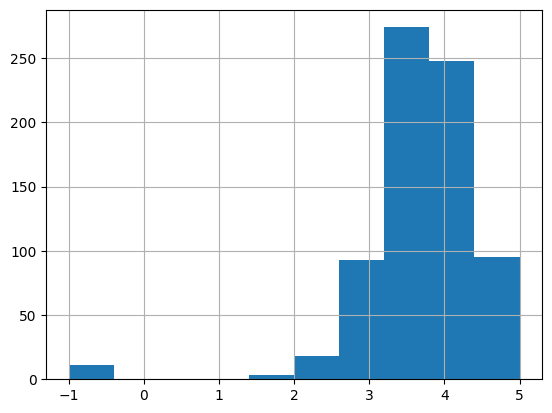

In [63]:
df.Rating.hist()

<Axes: >

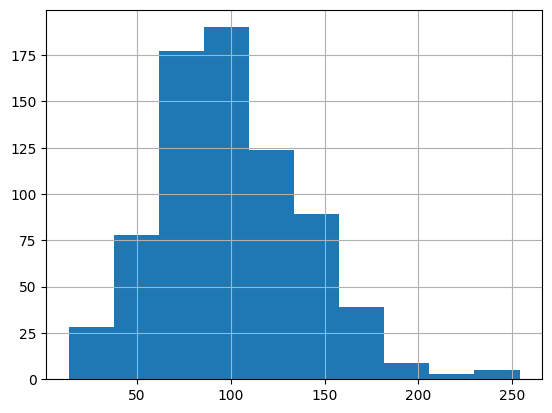

In [64]:
df.avg_salary.hist()

<Axes: >

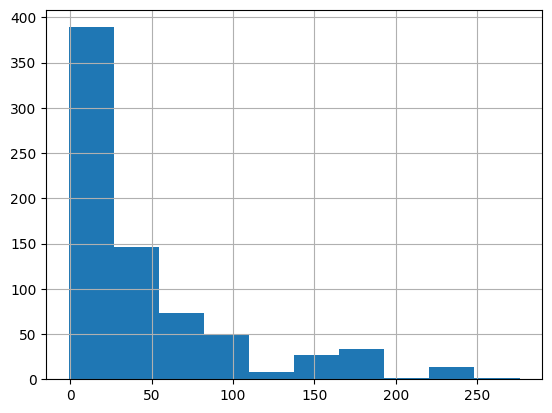

In [65]:
df.age.hist()

<Axes: >

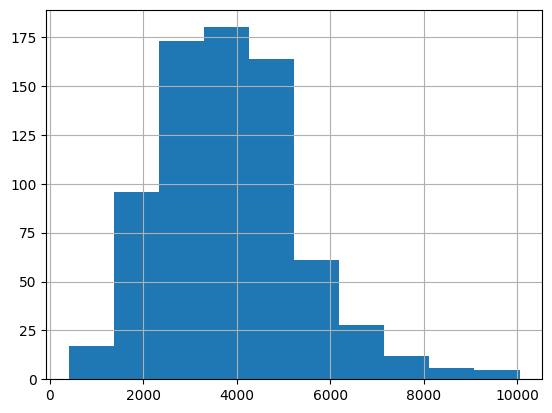

In [66]:
df.desc_len.hist()


<Axes: >

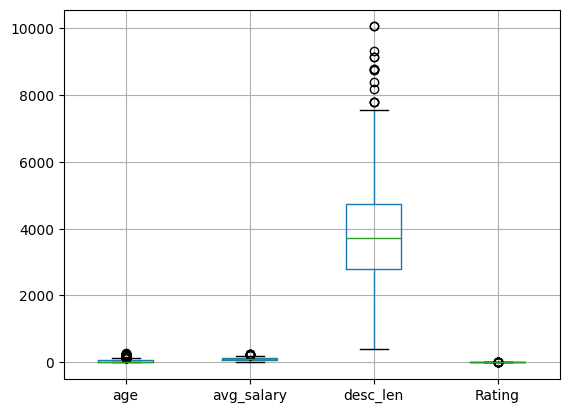

In [67]:
df.boxplot(column = ['age','avg_salary','desc_len','Rating'])

<Axes: >

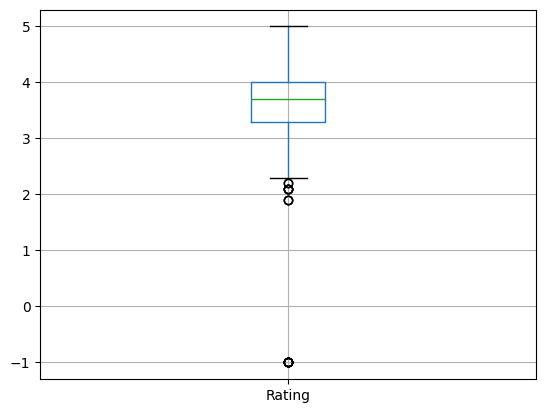

In [68]:
df.boxplot(column = ['Rating'])

In [69]:
df[['age','avg_salary','desc_len','Rating']].corr()

,age,avg_salary,desc_len,Rating
age,1.000000,0.019655,0.163911,0.021655
avg_salary,0.019655,1.000000,0.078808,0.013492
desc_len,0.163911,0.078808,1.000000,-0.012281
Rating,0.021655,0.013492,-0.012281,1.000000


<Axes: >

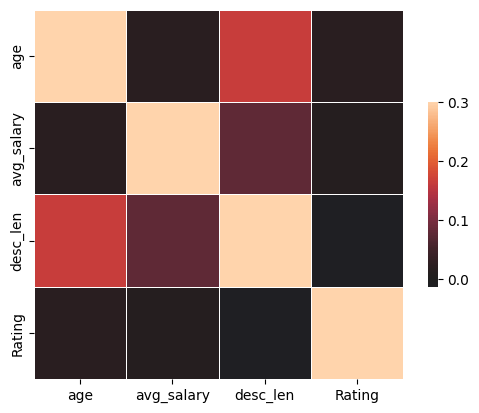

In [70]:
sns.heatmap(df[['age', 'avg_salary', 'desc_len', 'Rating']].corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

<Axes: >

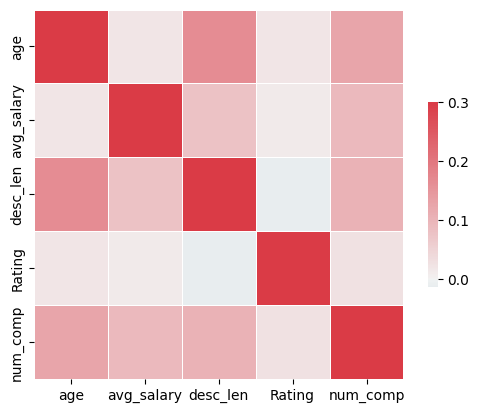

In [71]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[['age', 'avg_salary', 'desc_len', 'Rating','num_comp']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [72]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'excel',
       'R_yn', 'spark', 'aws', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [73]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','job_state', 'same_state','company_txt','python_yn', 'excel',
       'R_yn', 'spark', 'aws', 'job_simp', 'seniority']]

Graph for Location: total = 200


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


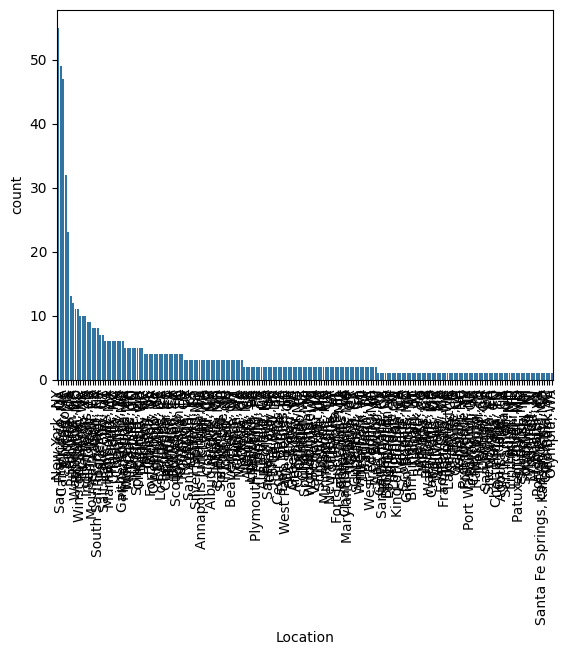

Graph for Headquarters: total = 198


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


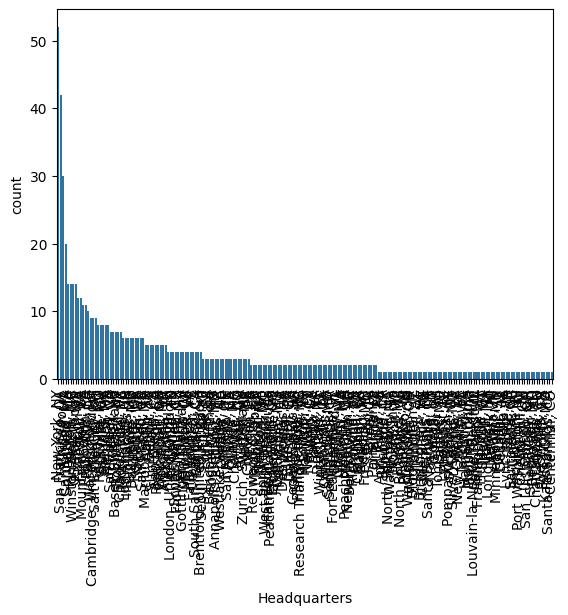

Graph for Size: total = 9


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


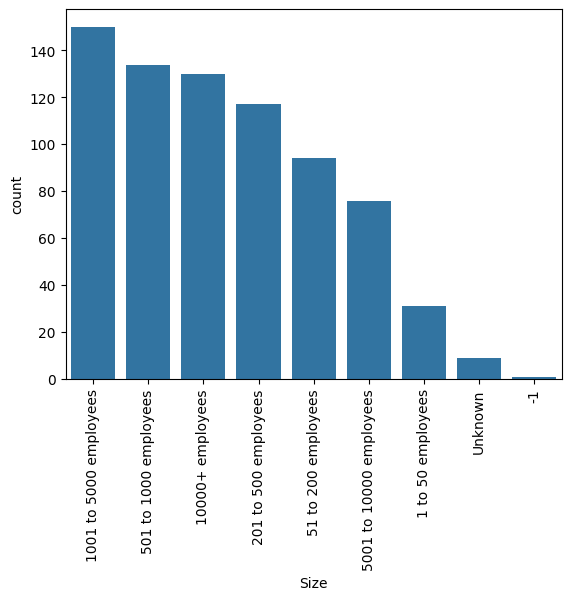

Graph for Type of ownership: total = 11


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


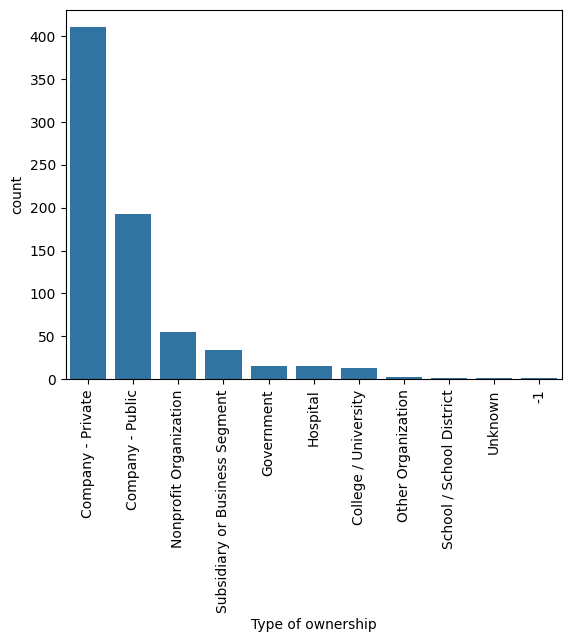

Graph for Industry: total = 60


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


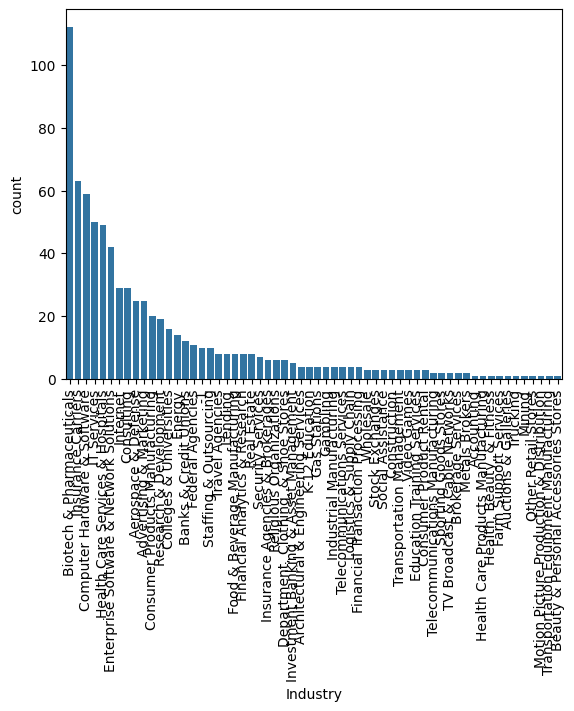

Graph for Sector: total = 25


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


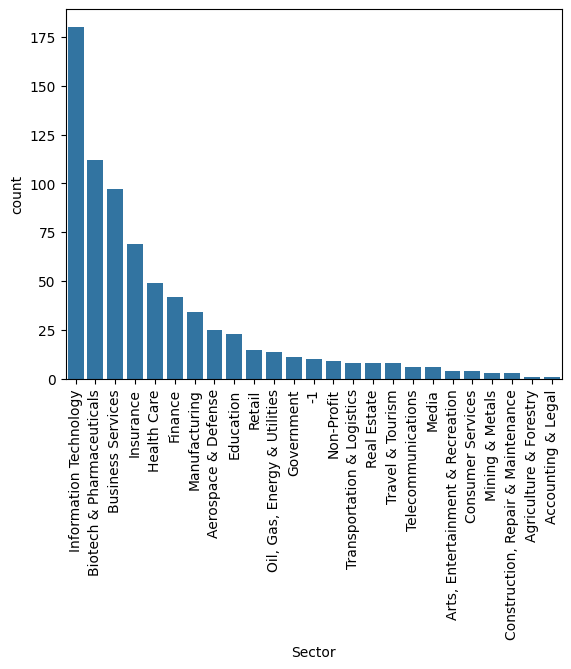

Graph for Revenue: total = 14


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


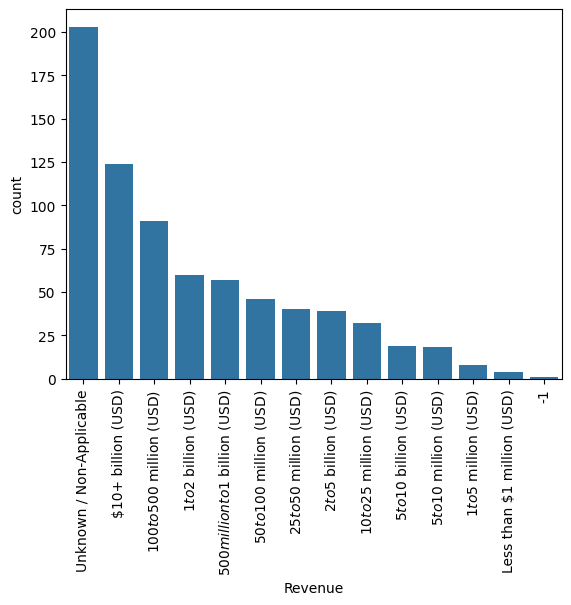

Graph for job_state: total = 38


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


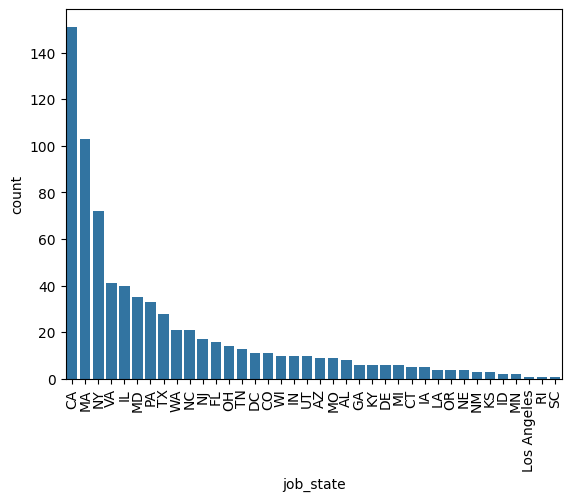

Graph for same_state: total = 2


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


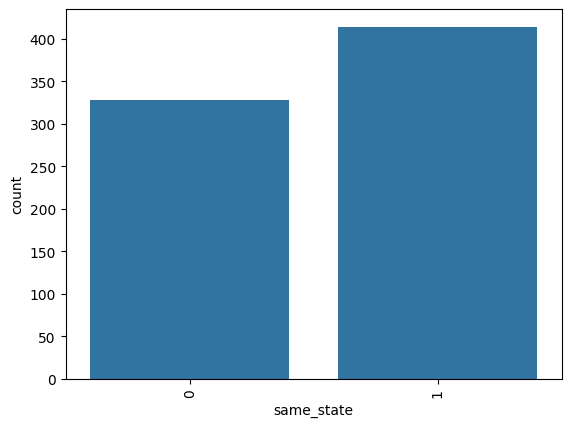

Graph for company_txt: total = 343


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


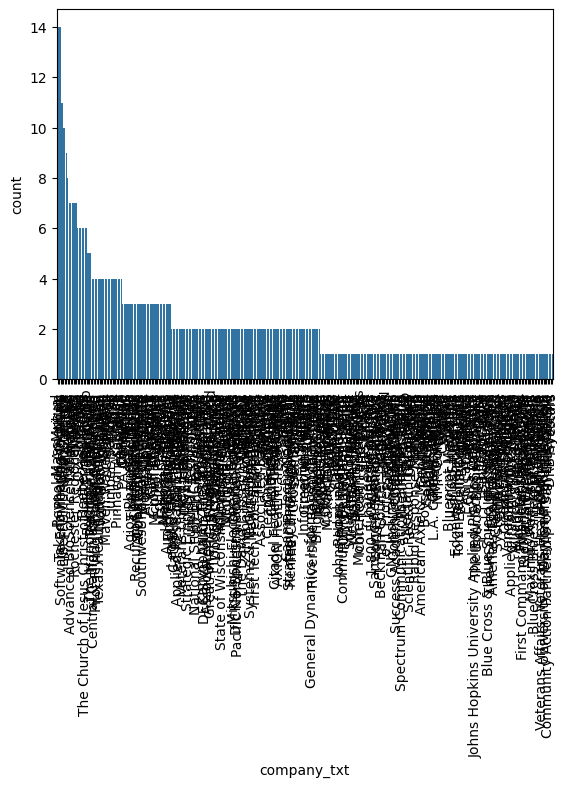

Graph for python_yn: total = 2


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


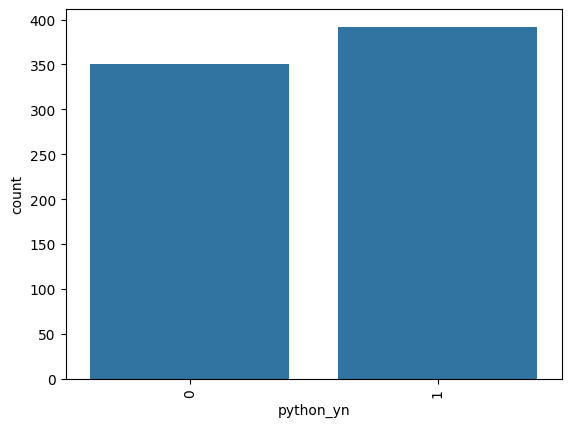

C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Graph for excel: total = 2


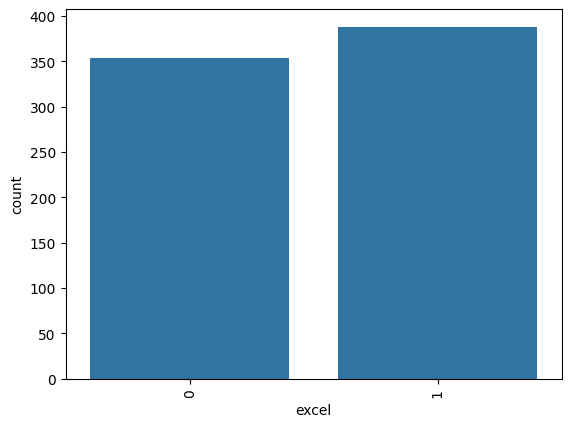

Graph for R_yn: total = 2


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


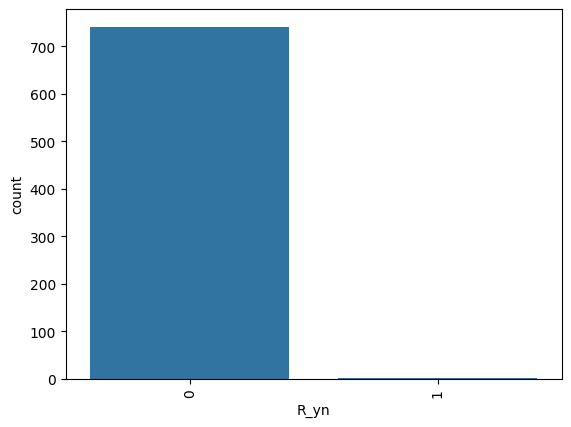

Graph for spark: total = 2


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


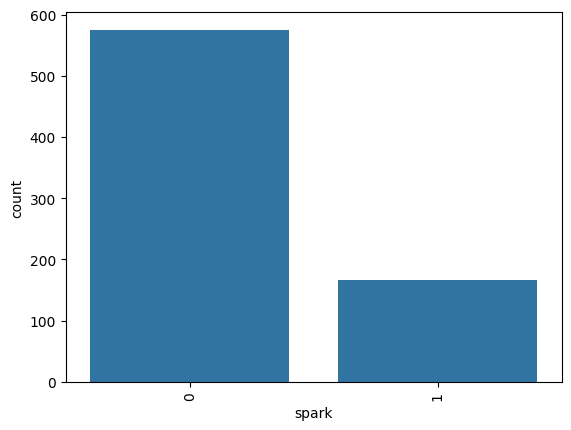

Graph for aws: total = 2


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


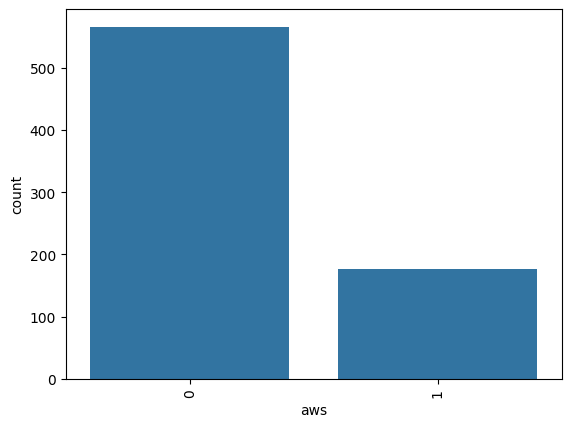

Graph for job_simp: total = 7


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


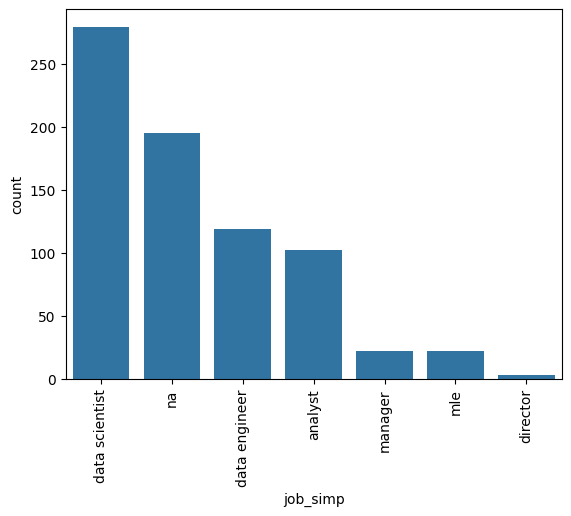

Graph for seniority: total = 3


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\3914693947.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


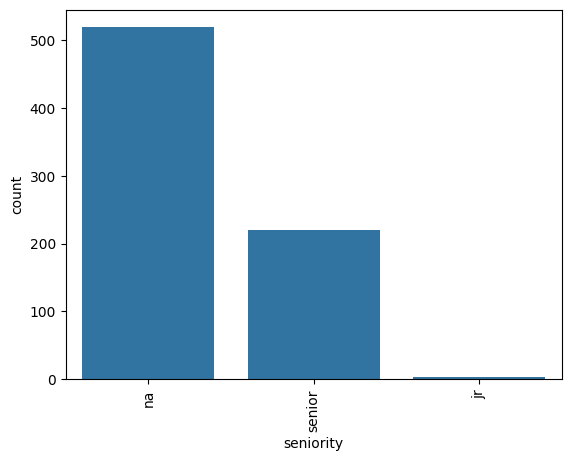

In [74]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\1964344028.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


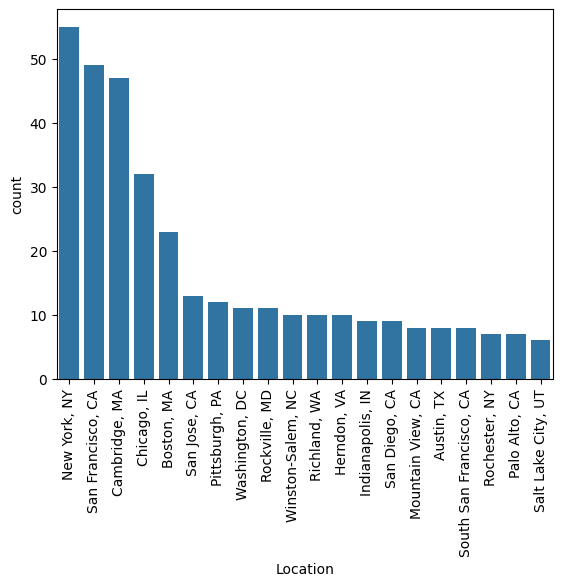

Graph for Headquarters: total = 20


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\1964344028.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


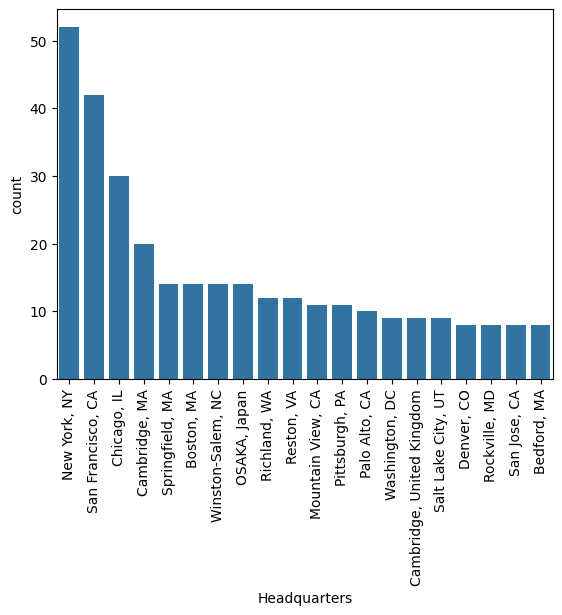

Graph for company_txt: total = 20


C:\Users\HP\AppData\Local\Temp\ipykernel_11064\1964344028.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


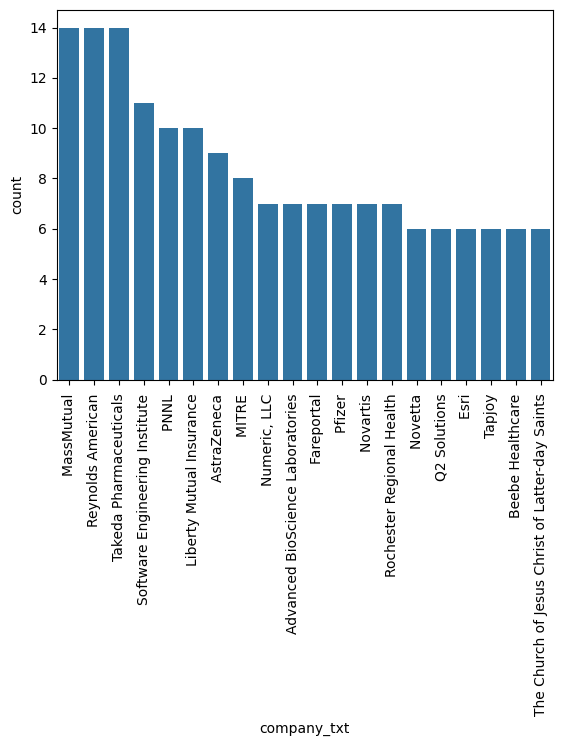

In [75]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [76]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'excel',
       'R_yn', 'spark', 'aws', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [77]:
pd.pivot_table(df, index ='job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,111.000000
manager,84.022727
mle,126.431818
na,90.464103


In [78]:
pd.pivot_table(df, index =['job_simp','seniority'],values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         111.000000
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          82.782609
               senior     109.061404

In [79]:
pd.pivot_table(df, index =['job_state','job_simp'],values='avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state job_simp                  
CA        mle             177.300000
DC        data scientist  149.000000
CA        data scientist  143.044776
UT        data scientist  140.500000
IL        na              139.458333
...                              ...
CO        na               31.500000
          analyst          29.500000
DE        na               27.500000
LA        na               20.000000
TN        analyst          13.500000

[113 rows x 1 columns]

In [80]:
pd.pivot_table(df, index =['job_state','job_simp'],values='avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[113 rows x 1 columns]

In [81]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [82]:
pd.pivot_table(df, index =['job_state','job_simp'],values='avg_salary',aggfunc='count').sort_values('job_state', ascending = False)

avg_salary
job_state   job_simp                  
WI          na                       4
            data scientist           3
            analyst                  3
WA          na                       1
            data scientist          17
            analyst                  3
VA          na                       5
            mle                      2
            data scientist          18
            data engineer           10
            analyst                  6
UT          data engineer            3
            analyst                  4
            data scientist           3
TX          na                       7
            data scientist          13
            data engineer            8
TN          data scientist           1
            data engineer           10
            analyst                  2
SC          na                       1
RI          analyst                  1
PA          manager                  3
            data engineer            1
            data scientist           6
            analyst                  8
            mle                      7
            na                       8
OR          data scientist           3
            data engineer            1
OH          na                       3
            data scientist           7
            analyst                  4
NY          na                      12
            mle                      2
            data scientist          40
            data engineer            4
            analyst                 14
NM          data scientist           3
NJ          data scientist           4
            analyst                  6
            data engineer            2
            manager                  2
            na                       3
NE          na                       4
NC          na                      12
            data scientist           3
            data engineer            6
MO          na                       3
            manager                  1
            data scientist           3
            analyst                  2
MN          data engineer            1
            analyst                  1
MI          data scientist           4
            manager                  2
MD          na                      16
            data scientist          13
            data engineer            3
            analyst                  3
MA          na                      49
            manager                  5
            director                 3
            data scientist          30
            data engineer           12
            analyst                  4
Los Angeles data scientist           1
LA          analyst                  1
            na                       1
            data engineer            2
KY          data scientist           2
            na                       4
KS          mle                      3
IN          na                       4
            data scientist           2
            data engineer            4
IL          na                      12
            mle                      2
            data scientist          15
            data engineer            8
            analyst                  3
ID          analyst                  2
IA          data engineer            3
            analyst                  2
GA          data scientist           3
            na                       3
FL          data scientist           7
            data engineer            3
            analyst                  6
DE          na                       6
DC          data scientist           5
            data engineer            4
            analyst                  2
CT          na                       3
            data scientist           2
CO          data scientist           3
            analyst                  1
            data engineer            3
            mle                      1
            na                       3
CA          na                      27
           

In [83]:
pd.pivot_table(df[df.job_simp=='data scientist'], index =['job_state'],values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [84]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'excel',
       'R_yn', 'spark', 'aws', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [85]:
#rating, industry, sector, revenue, Number of com, hourly, employer provided, python, r, spark, aws, excel, desc_len, typs of onwership

In [86]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer provided', 
               'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership','avg_salary']]


In [87]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [88]:
pd.pivot_table(df_pivots, index = 'Revenue', columns='python_yn', values='avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),80.093750,113.420455
$1 to $5 million (USD),102.000000,121.785714
$10 to $25 million (USD),80.875000,119.843750
$10+ billion (USD),102.393939,129.698276
$100 to $500 million (USD),67.319149,100.068182
$2 to $5 billion (USD),79.000000,106.886364
$25 to $50 million (USD),79.166667,88.343750
$5 to $10 billion (USD),74.888889,111.550000
$5 to $10 million (USD),112.111111,140.111111


In [89]:

df= pd.read_csv('eda_data.csv')

In [90]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [94]:
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 
               'Revenue', 'num_comp', 'hourly', 'employer_provided', 'job_state', 'same_state', 
               'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len']]


In [95]:
df_dum =pd.get_dummies(df_model)

In [96]:
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,R_yn,spark,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,False,False,True,False,False,False,False,False,True,False
1,87.5,3.4,0,0,0,0,36,1,0,0,...,False,False,True,False,False,False,False,False,True,False
2,85.0,4.8,0,0,0,1,10,1,0,1,...,False,False,True,False,False,False,False,False,True,False
3,76.5,3.8,3,0,0,1,55,1,0,0,...,False,False,True,False,False,False,False,False,True,False
4,114.5,2.9,3,0,0,1,22,1,0,0,...,False,False,True,False,False,False,False,False,True,False
5,95.0,3.4,3,0,0,1,20,1,0,0,...,False,False,True,False,False,False,False,False,True,False
6,73.5,4.1,0,0,0,1,12,0,0,0,...,False,False,True,False,False,False,False,False,True,False
7,114.0,3.8,0,0,0,0,15,1,0,1,...,False,False,True,False,False,False,False,False,True,False
8,61.0,3.3,0,0,0,1,6,0,0,0,...,False,False,False,False,False,False,True,False,True,False
9,140.0,4.6,2,0,0,1,11,1,0,1,...,False,False,True,False,False,False,False,False,True,False
